In [1]:
from IPython import display
import numpy as np
import scipy.sparse
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.sparse.linalg
import math

In [2]:
mat3d = np.array([[[[1, 2, 3], [4, 5, 6], [7, 8, 9]], 
                  [[-1, -2, -3], [-4, -5, -6], [-7, -8, -9]], 
                  [[10, 20, 30], [40, 50, 60], [70, 80, 90]]],
                 [[[0.1, 0.2, 0.3], [0.4, 0.5, 0.6], [0.7, 0.8, 0.9]], 
                  [[-0.1, -0.2, -0.3], [-0.4, -0.5, -0.6], [-0.7, -0.8, -0.9]], 
                  [[11, 21, 31], [41, 51, 61], [71, 81, 91]]]])

g_arr = np.array([-1, 2])


In [3]:
print(mat3d)
print(np.shape(mat3d))

[[[[ 1.   2.   3. ]
   [ 4.   5.   6. ]
   [ 7.   8.   9. ]]

  [[-1.  -2.  -3. ]
   [-4.  -5.  -6. ]
   [-7.  -8.  -9. ]]

  [[10.  20.  30. ]
   [40.  50.  60. ]
   [70.  80.  90. ]]]


 [[[ 0.1  0.2  0.3]
   [ 0.4  0.5  0.6]
   [ 0.7  0.8  0.9]]

  [[-0.1 -0.2 -0.3]
   [-0.4 -0.5 -0.6]
   [-0.7 -0.8 -0.9]]

  [[11.  21.  31. ]
   [41.  51.  61. ]
   [71.  81.  91. ]]]]
(2, 3, 3, 3)


In [24]:
print(mat3d[0,0,0,0])

1.0


In [19]:
mat3d[0].flatten()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., -1., -2., -3., -4.,
       -5., -6., -7., -8., -9., 10., 20., 30., 40., 50., 60., 70., 80.,
       90.])

In [4]:
def B_construct_1D(Na, ghosts_included = True):
    """
    Input: Na (int), number of grid points
           ghosts_included (bool), default is True (B is (Na-2) x (Na-2) and rho is Na-2)
                                           if False (B is (Na) x (Na) and rho is Na)
    Output: B (float array), 1D Poisson discretization matrix
    """
    # construct the tridiagonal Poisson discretization matrix B
    if (ghosts_included):
        
        offsets = [-1, 0, 1] 
        diags = []
        diags.append(-np.ones(Na-3)) 
        diags.append(2 * np.ones(Na-2))
        diags.append(-np.ones(Na-3))
        B = scipy.sparse.diags(diags, offsets, format='csr') # construct a CSR version of B
        B = B.toarray() # this function will only be called once so CSR not too important
        #print('The shape of B is', np.shape(B))
        #print('\nB is \n', B)        
    else:    
        offsets = [-1, 0, 1] 
        diags = []
        
        diags.append(-np.ones(Na-3)) 
        diags.append(2 * np.ones(Na-2))
        diags.append(-np.ones(Na-3))
        B = scipy.sparse.diags(diags, offsets, format='csr') # construct a CSR version of B
        B = B.toarray() # this function will only be called once so CSR not too important
        B = np.pad(B, [1, 1], mode='constant')
        B[0][0] = 1
        B[np.shape(B)[0]-1][np.shape(B)[0]-1] = 1
        #print('The shape of B is', np.shape(B))
        #print('\nB is \n', B)

    return B


##########
# NOTE : # The Kroenecker product is associative!!! :) 
##########

def poisson_matrix_3D(Na, ghosts_included = True):
    
    B = B_construct_1D(Na, ghosts_included)
    
    if (ghosts_included):
        
        # construct the Poisson discretization matrix A
        A = np.kron(B, np.kron(np.eye(np.shape(B)[0]), np.eye(np.shape(B)[0]))) + np.kron(np.eye(np.shape(B)[0]), np.kron(B, np.eye(np.shape(B)[0]))) + np.kron(np.eye(np.shape(B)[0]), np.kron(np.eye(np.shape(B)[0]), B))  
        
    else:
        
        print('Error: Not Implemented yet :) OOPS')
    
    print('The shape of B is', np.shape(B))
    print('The shape of A is', np.shape(A))
    
    return A

In [5]:
A = poisson_matrix_3D(5)

The shape of B is (3, 3)
The shape of A is (27, 27)


In [6]:
abc = np.array([[2, -1, 0], [-1, 2, -1], [0, -1, 2]])

Abc = np.kron(abc, np.eye(np.shape(abc)[0])) + np.kron(np.eye(np.shape(abc)[0]), abc)


Abc

array([[ 4., -1.,  0., -1., -0.,  0.,  0.,  0.,  0.],
       [-1.,  4., -1., -0., -1., -0.,  0.,  0.,  0.],
       [ 0., -1.,  4.,  0., -0., -1.,  0.,  0.,  0.],
       [-1., -0.,  0.,  4., -1.,  0., -1., -0.,  0.],
       [-0., -1., -0., -1.,  4., -1., -0., -1., -0.],
       [ 0., -0., -1.,  0., -1.,  4.,  0., -0., -1.],
       [ 0.,  0.,  0., -1., -0.,  0.,  4., -1.,  0.],
       [ 0.,  0.,  0., -0., -1., -0., -1.,  4., -1.],
       [ 0.,  0.,  0.,  0., -0., -1.,  0., -1.,  4.]])

In [44]:
np.shape(A)

(27, 27)

In [45]:
print(A)

[[ 6. -1.  0. -1.  0.  0.  0.  0.  0. -1.  0.  0.  0. -0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  6. -1.  0. -1.  0.  0.  0.  0.  0. -1.  0. -0.  0. -0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  6.  0.  0. -1.  0.  0.  0.  0.  0. -1.  0. -0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  0.  6. -1.  0. -1.  0.  0.  0. -0.  0. -1.  0.  0.  0. -0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0. -1.  6. -1.  0. -1.  0. -0.  0. -0.  0. -1.  0. -0.  0. -0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0. -1.  6.  0.  0. -1.  0. -0.  0.  0.  0. -1.  0. -0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  6. -1.  0.  0.  0.  0.  0. -0.  0. -1.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0. -1.  6. -1.  0.  0.  0. -0.  0. -0.  0. -1.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0. -1.  6.  0.  0.  0.  0. -0.  0.  0.  0. -1.
   0.  0.  0.  0.  0. 

In [73]:
import matplotlib.pylab as plt
import scipy.sparse as sparse

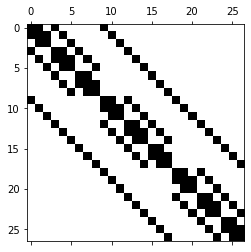

In [103]:
plt.spy(A)

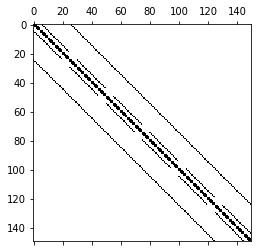

In [137]:
plt.spy(A_mat)

[[ 6. -1. -0. ... -0. -0. -0.]
 [-1.  6. -1. ... -0. -0. -0.]
 [-0. -0.  6. ... -0. -0. -0.]
 ...
 [-0. -0. -0. ...  6. -1. -0.]
 [-0. -0. -0. ... -1.  6. -1.]
 [-0. -0. -0. ... -0. -1.  6.]]


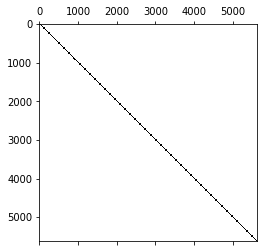

In [7]:
def poisson_matrix_3D_RD(Nx, Ny, Nz):
    
    A_matrix = np.zeros((Nx*Ny*Nz, Nx*Ny*Nz))
    
    A_matrix += np.diag(np.ones(Nx * Ny * Nz - Nx), -Nx) + np.diag(np.ones(Nx * Ny * Nz - Nx), Nx) 
    
    for i in range(Nx*Ny*Nz):
        
        A_matrix[i][i] = -6
        
        if (i > 0):
            
            A_matrix[i-1][i] = 1
            
            if (((i + 1) % Nx == 1) and (i < Nx * Ny * Nz - 1)):
            
                A_matrix[i-1][i] = 0
            
        if (i < Nx * Ny * Nz) and (i > 0):
            
            A_matrix[i][i-1] = 1
            
        if (((i + 1) % Nx == 1) and (i > 2)):
            
            A_matrix[i][i-1] = 0
            
            
        if (((i + 1) % (Nx*Ny) == 0) and (i < Nx * Ny * Nz - Nx)):
            
            # reset i
            i -= Nx-1
                        
            cntr = 0
            
            while (cntr < Nx):
            
                A_matrix[i+cntr+Nx][i+cntr] = 0
                A_matrix[i+cntr][i+cntr+Nx] = 0
                
                cntr += 1
            
            i += Nx-1
            
    A_matrix += np.diag(np.ones(Nx * Ny * Nz - Nx * Ny), -Nx*Ny) + np.diag(np.ones(Nx * Ny * Nz - Nx * Ny), Nx*Ny)
    A_matrix[2][1] = 0
    
    return -A_matrix


nx, ny, nz = (25, 15, 15)

A_mat = poisson_matrix_3D_RD(nx, ny, nz)

print(A_mat)

plt.spy(A_mat)

In [ ]:
nx, ny, nz = (50, 50, 20)
A = poisson_matrix_3D_RD(nx, ny, nz)


In [ ]:
rhosus = np.zeros((nx, ny ,nz))

rhosus[int(nx/2), int(ny/2), int(nz/2)] = 10

rhosus = rhosus.flatten()

phisus = scipy.sparse.linalg.cg(A, rhosus)[0]

phisus = phisus.reshape((ny, nx, nz))

phisus = np.pad(phisus, 1)
x = np.linspace(0, 4, nx+2)
y = np.linspace(0, 4, ny+2)

xv, yv = np.meshgrid(x, y, sparse=True)

print('xv is', np.shape(xv))
print('yv is', np.shape(yv))

for i in range(1,nz):
    
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (2, 2))
    surf = ax.plot_surface(xv, yv, phisus[:,:,i], cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    ax.set_title(r'$\phi(x,y)$, without cells $\in \Omega$')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    
plt.show()

xv is (1, 27)
yv is (17, 1)


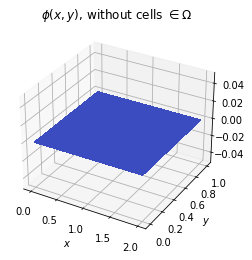

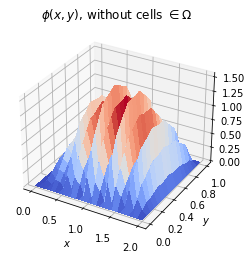

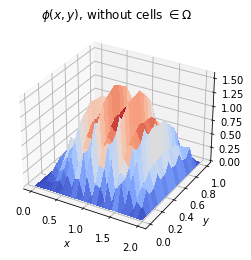

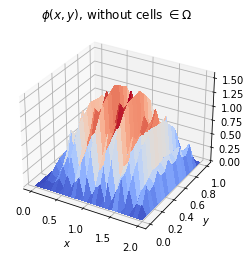

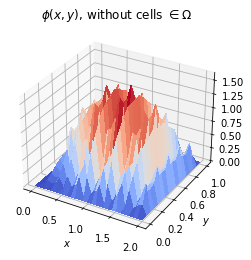

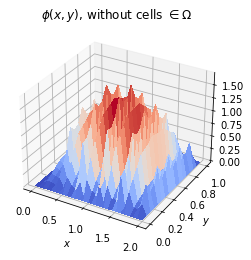

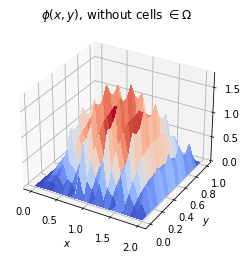

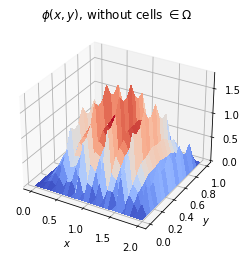

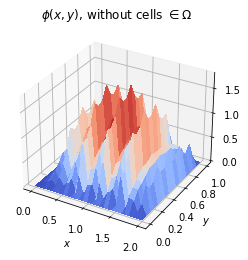

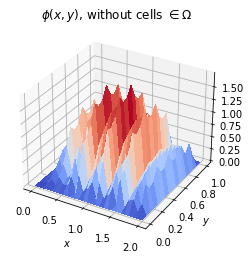

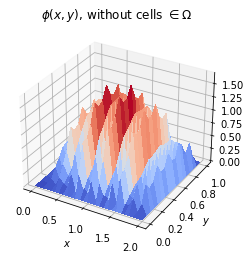

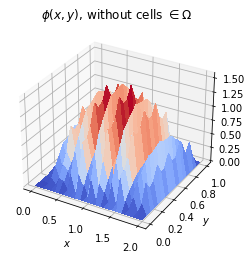

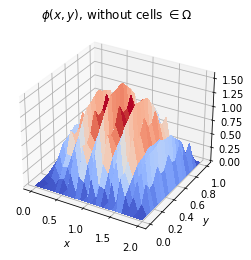

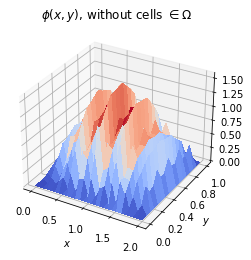

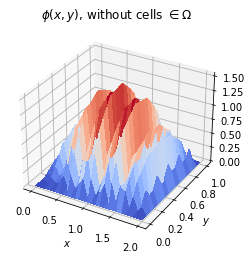

In [307]:
rhosus = np.zeros((nx-2,ny-2,nz-2))
rhosus[:,3] = 1
rhosus = np.pad(rhosus,1).flatten()

phisus = scipy.sparse.linalg.cg(A_mat, rhosus)[0]

phisus = phisus.reshape((ny, nx, nz))

phisus = np.pad(phisus, 1)


x = np.linspace(0, 2, nx+2)
y = np.linspace(0, 1, ny+2)

xv, yv = np.meshgrid(x, y, sparse=True)

print('xv is', np.shape(xv))
print('yv is', np.shape(yv))

for i in range(nz):
    
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    surf = ax.plot_surface(xv, yv, phisus[:,:,i], cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    ax.set_title(r'$\phi(x,y)$, without cells $\in \Omega$')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    
plt.show()

xv is (1, 22)
yv is (22, 1)


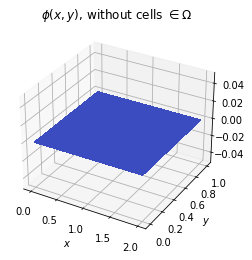

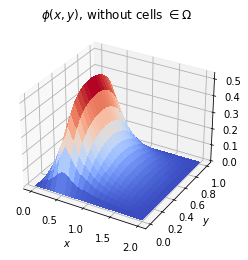

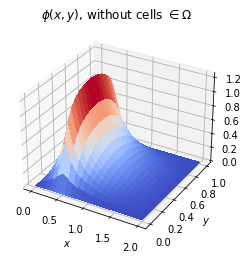

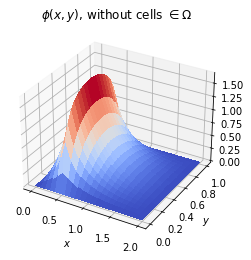

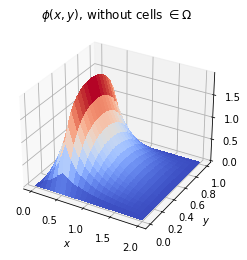

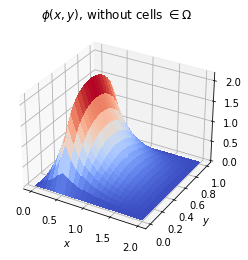

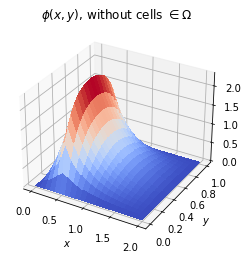

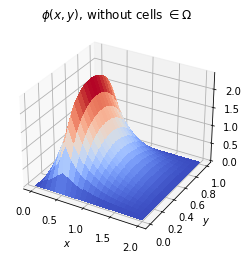

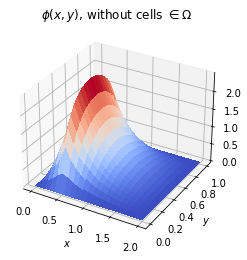

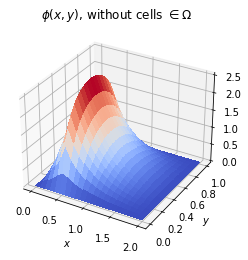

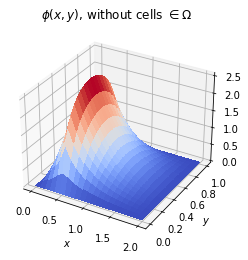

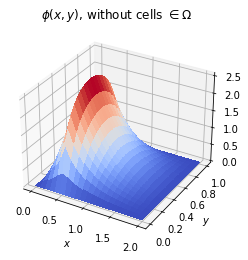

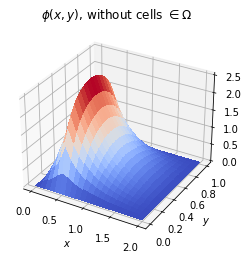

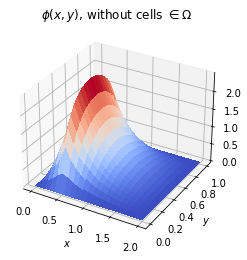

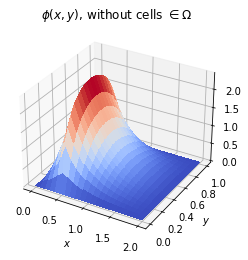

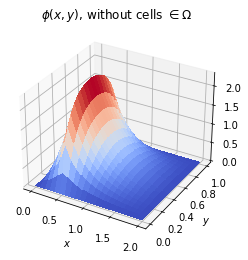

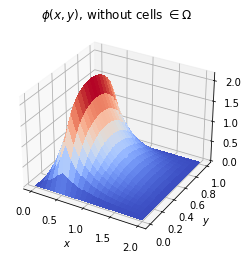

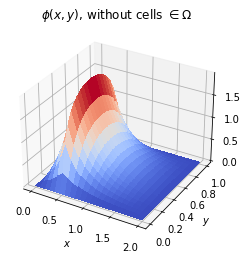

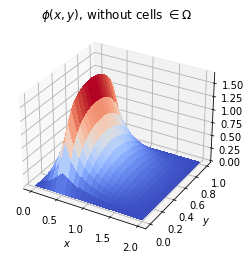

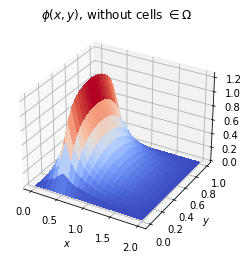

In [293]:
rhosus = np.zeros((nx-2,ny-2,nz-2))
rhosus[:,3] = 1
rhosus = np.pad(rhosus,1).flatten()

phisus = scipy.sparse.linalg.cg(A_mat, rhosus)[0]

phisus = phisus.reshape((ny, nx, nz))

phisus = np.pad(phisus, 1)


x = np.linspace(0, 2, nx+2)
y = np.linspace(0, 1, ny+2)

xv, yv = np.meshgrid(x, y, sparse=True)

print('xv is', np.shape(xv))
print('yv is', np.shape(yv))

for i in range(nz):
    
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    surf = ax.plot_surface(xv, yv, phisus[:,:,i], cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    ax.set_title(r'$\phi(x,y)$, without cells $\in \Omega$')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    
plt.show()

In [245]:
A = poisson_matrix_3D(17)

The shape of B is (15, 15)
The shape of A is (3375, 3375)


In [235]:
np.shape(phisus[:,:,0])

(17, 9)

xv is (1, 22)
yv is (22, 1)


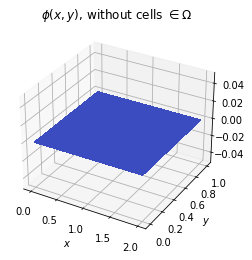

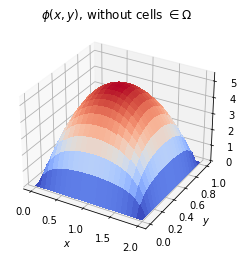

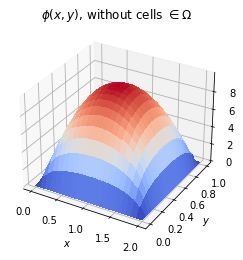

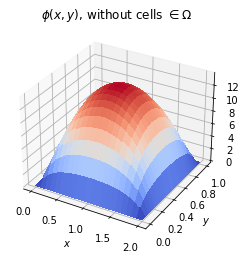

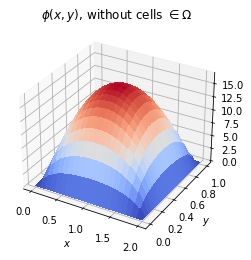

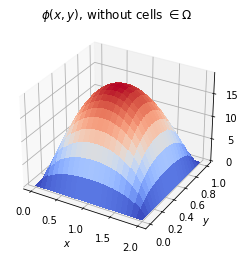

In [4]:
def poisson_matrix_3D_matlab(nx, ny, nz):
    
    ex = np.ones(nx) # dir vec
    
    Lx = -3 * np.diag(ex,0) + np.diag(ex[1:],-1) + np.diag(ex[1:],1)
    
    ey = np.ones(ny) # dir vec
    
    Ly = -3 * np.diag(ey,0) + np.diag(ey[1:],-1) + np.diag(ey[1:],1)
    
    # now it becomes 2D
    L2 = np.kron(np.eye(ny), Lx) + np.kron(Ly, np.eye(nx))
    
    num_gird_pts = nx * ny * nz
    
    A = -np.kron(np.eye(nz), L2) - np.diag(np.ones(num_gird_pts - nx * ny), - nx * ny) - np.diag(np.ones(num_gird_pts - nx * ny), nx * ny)
    
    return A

nx, ny, nz = (50, 50, 20) # 50 x 50 x 20 took 4-5 mins to run
A = poisson_matrix_3D_matlab(nx, ny, nz)

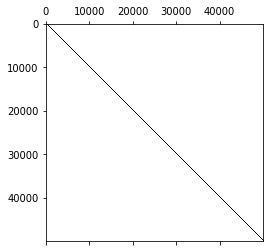

In [5]:
plt.spy(A)

In [ ]:
A

xv is (1, 52)
yv is (52, 1)


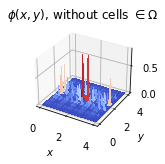

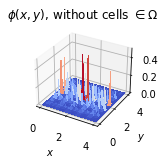

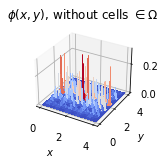

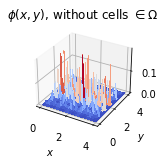

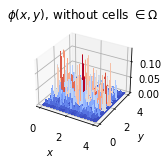

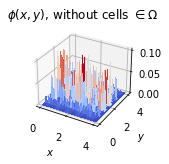

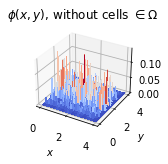

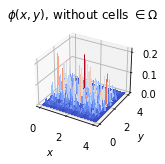

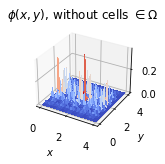

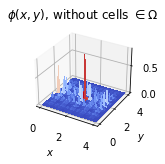

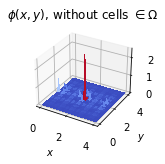

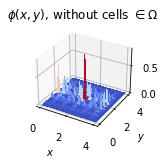

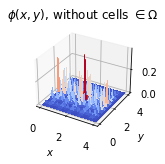

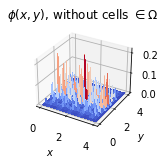

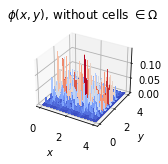

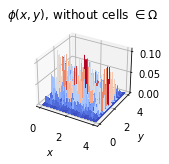

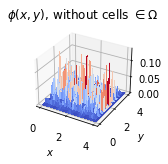

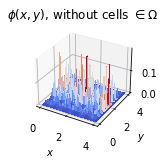

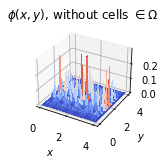

In [6]:
rhosus = np.zeros((nx, ny ,nz))

rhosus[int(nx/2), int(ny/2), int(nz/2)] = 10

rhosus = rhosus.flatten()

phisus = scipy.sparse.linalg.cg(A, rhosus)[0]

phisus = phisus.reshape((ny, nx, nz))

phisus = np.pad(phisus, 1)
x = np.linspace(0, 4, nx+2)
y = np.linspace(0, 4, ny+2)

xv, yv = np.meshgrid(x, y, sparse=True)

print('xv is', np.shape(xv))
print('yv is', np.shape(yv))

for i in range(1,nz):
    
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (2, 2))
    surf = ax.plot_surface(xv, yv, phisus[:,:,i], cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    ax.set_title(r'$\phi(x,y)$, without cells $\in \Omega$')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    
plt.show()

In [237]:
def rho_update_3D(Na, n_alpha, q_alpha):
    
    rho = np.zeros(np.shape(n_alpha)[1:]) # set rho to Na x Na size, bypass the 1st array dimension
    
    # iterate over the alphas
    for i in range(np.shape(n_alpha)[0]):
        
        rho += n_alpha[i] * q_alpha[i]
        
    return rho # return 3D rho array
        

def phi_update_3D(Na, A_matrix, rho, ghosts_included = True, epsilon_0 = 1, epsilon_r = 1): 
    
    a = 1.0/Na # calculate dx
    
    c_rho = a**2 * np.exp(1)**2 / (2.0 * epsilon_0 * epsilon_r) # IS THIS STILL THE SAME AS IT WAS IN 1D and 2D ?????
    
    if (ghosts_included):
        
        rho_vec = rho[1:-1,1:-1,1:-1] # remove boundaries/ghosts
        rho_vec = rho_vec.flatten() # from 3D to 1D
        
        phi_soln = scipy.sparse.linalg.cg(A_matrix, c_rho * rho_vec)[0]
        phi_soln = phi_soln.reshape((Na - 2, Na - 2, Na - 2))
        phi = np.pad(phi_soln,1)
    
    else:
        
        print('Error: Not Implemented yet :) OOPS')
        
    return phi # phi is returned as a 3D array here


def mu_and_v_alpha_update_3D(Na, mu_bar_alpha, q_alpha, phi, D_alpha):
    
    #Phi = phi.reshape((int(Na), int(Na))) # store Phi as a 2D Na x Na array
    
    a = 1.0/Na # dx
    
    # initialize mu_alpha
    mu_alpha = np.zeros(np.shape(mu_bar_alpha))

    # initialize v_alpha
    v_alpha = np.zeros(np.shape(mu_bar_alpha))
    
    for i in range(len(q_alpha)): # loop over 1st dimension (layer) of 3D mu_alpha & v_alpha tensors
                                        # might reconsider q_alpha[i] * phi
        mu_alpha[i] = mu_bar_alpha[i] + q_alpha[i] * phi  

        v_alpha[i] = (1.0/a) * D_alpha[i]
          
    return mu_alpha, v_alpha # both returned as 4D alpha x Na x Na x Na arrays


In [149]:
def J_alpha_update_3D(Na, T, k_B, mu_alpha, v_alpha, n_alpha):
    """
    Input: Na (int), number of grid points
           T (float), temperature
           mu_alpha (float array), (Na) x (alpha) 
           v_alpha (float array), (Na) x (alpha) 
           n_alpha (float array), (Na) x (alpha) 
    Output: J_alpha (float array), (Na + 1) x (alpha) particle current array
    """
    
    # initialize J_alpha_UMat to have m x (Na) x (Na) x (Na) dimensions
    J_alpha_UMat = np.zeros((np.shape(n_alpha)[0], np.shape(n_alpha)[1], np.shape(n_alpha)[2], np.shape(n_alpha)[3]))
    # Our update matrix which we will simply scale and then add on n_alpha_Current !!! Pretty COOL !
    
    # Our axes : +-----> (x-axis)
    #           /|
    #          / |
    #(z-axis) v  v (y-axis)
    # each cell n_alpha has 6 possible neighbors, left, right, top, bottom, front, back
        # all of these neighbors exchange information to form dn/dt
        # NOTE: some cells have 3 (corner) or 4 (edge) or 5 (surface) neighbors which needs to be accounted for
                #(any rectangular prism domain has 8 corner cells, 12 * (Na - 2) edge cells, 
                # and 6 * (Na - 2)^2 surface cells)
    # now iterate over each grid index, update J_alpha_UMat values for all alphas each iteration
    
    c = 2 * k_B * T # just store as one value
    
    # 1st : Deal with the Interior (Na - 2) x (Na - 2) x (Na - 2) domain
    for i in range(1, np.shape(n_alpha)[1] - 1):
        for j in range(1, np.shape(n_alpha)[2] - 1):
            for k in range(1, np.shape(n_alpha)[3] - 1):
            
                # signs given to be positive if flow into cell i,j
                J_left = v_alpha[:,i-1,j,k] * n_alpha[:,i-1,j,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i-1,j,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i-1,j,k])/(c))
                J_right = v_alpha[:,i+1,j,k] * n_alpha[:,i+1,j,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i+1,j,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i+1,j,k])/(c))
                J_top = v_alpha[:,i,j-1,k] * n_alpha[:,i,j-1,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j-1,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j-1,k])/(c))
                J_bottom = v_alpha[:,i,j+1,k] * n_alpha[:,i,j+1,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j+1,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j+1,k])/(c))
                J_front = v_alpha[:,i,j,k-1] * n_alpha[:,i,j,k-1] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k-1])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k-1])/(c))
                J_back = v_alpha[:,i,j,k+1] * n_alpha[:,i,j,k+1] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k+1])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k+1])/(c))
            
                J_alpha_UMat[:,i,j,k] = J_left + J_right + J_top + J_bottom + J_front + J_back
    
    
    # 2nd : Deal with the Surfaces
    for i in range(1, np.shape(n_alpha)[1] - 1):
        for j in range(1, np.shape(n_alpha)[2] - 1):
            
            # top surface
            k = 0
            J_left = v_alpha[:,i-1,j,k] * n_alpha[:,i-1,j,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i-1,j,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i-1,j,k])/(c))
            J_right = v_alpha[:,i+1,j,k] * n_alpha[:,i+1,j,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i+1,j,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i+1,j,k])/(c))
            J_top = v_alpha[:,i,j-1,k] * n_alpha[:,i,j-1,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j-1,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j-1,k])/(c))
            J_bottom = v_alpha[:,i,j+1,k] * n_alpha[:,i,j+1,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j+1,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j+1,k])/(c))
            J_back = v_alpha[:,i,j,k+1] * n_alpha[:,i,j,k+1] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k+1])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k+1])/(c))
            
            J_alpha_UMat[:,i,j,k] = J_left + J_right + J_top + J_bottom + J_back
    
            # bottom surface
            k = np.shape(n_alpha)[3] - 1
            J_left = v_alpha[:,i-1,j,k] * n_alpha[:,i-1,j,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i-1,j,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i-1,j,k])/(c))
            J_right = v_alpha[:,i+1,j,k] * n_alpha[:,i+1,j,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i+1,j,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i+1,j,k])/(c))
            J_top = v_alpha[:,i,j-1,k] * n_alpha[:,i,j-1,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j-1,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j-1,k])/(c))
            J_bottom = v_alpha[:,i,j+1,k] * n_alpha[:,i,j+1,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j+1,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j+1,k])/(c))
            J_front = v_alpha[:,i,j,k-1] * n_alpha[:,i,j,k-1] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k-1])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k-1])/(c))
            
            J_alpha_UMat[:,i,j,k] = J_left + J_right + J_top + J_bottom + J_front 
    
    for i in range(1, np.shape(n_alpha)[1] - 1):
        for k in range(1, np.shape(n_alpha)[3] - 1):
            
            # front surface
            j = 0
            J_left = v_alpha[:,i-1,j,k] * n_alpha[:,i-1,j,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i-1,j,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i-1,j,k])/(c))
            J_right = v_alpha[:,i+1,j,k] * n_alpha[:,i+1,j,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i+1,j,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i+1,j,k])/(c))
            J_bottom = v_alpha[:,i,j+1,k] * n_alpha[:,i,j+1,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j+1,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j+1,k])/(c))
            J_front = v_alpha[:,i,j,k-1] * n_alpha[:,i,j,k-1] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k-1])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k-1])/(c))
            J_back = v_alpha[:,i,j,k+1] * n_alpha[:,i,j,k+1] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k+1])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k+1])/(c))
            
            J_alpha_UMat[:,i,j,k] = J_left + J_right + J_bottom + J_front + J_back
    
            # bottom surface
            j = np.shape(n_alpha)[2] - 1
            J_left = v_alpha[:,i-1,j,k] * n_alpha[:,i-1,j,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i-1,j,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i-1,j,k])/(c))
            J_right = v_alpha[:,i+1,j,k] * n_alpha[:,i+1,j,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i+1,j,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i+1,j,k])/(c))
            J_top = v_alpha[:,i,j-1,k] * n_alpha[:,i,j-1,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j-1,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j-1,k])/(c))
            J_front = v_alpha[:,i,j,k-1] * n_alpha[:,i,j,k-1] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k-1])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k-1])/(c))
            J_back = v_alpha[:,i,j,k+1] * n_alpha[:,i,j,k+1] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k+1])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k+1])/(c))
            
            J_alpha_UMat[:,i,j,k] = J_left + J_right + J_top + J_front + J_back
    
    for j in range(1, np.shape(n_alpha)[2] - 1):
        for k in range(1, np.shape(n_alpha)[3] - 1):
            
            # left surface
            i = 0
            J_right = v_alpha[:,i+1,j,k] * n_alpha[:,i+1,j,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i+1,j,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i+1,j,k])/(c))
            J_top = v_alpha[:,i,j-1,k] * n_alpha[:,i,j-1,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j-1,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j-1,k])/(c))
            J_bottom = v_alpha[:,i,j+1,k] * n_alpha[:,i,j+1,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j+1,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j+1,k])/(c))
            J_front = v_alpha[:,i,j,k-1] * n_alpha[:,i,j,k-1] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k-1])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k-1])/(c))
            J_back = v_alpha[:,i,j,k+1] * n_alpha[:,i,j,k+1] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k+1])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k+1])/(c))
            
            J_alpha_UMat[:,i,j,k] = J_right + J_top + J_bottom + J_front + J_back
    
            # right surface
            i = np.shape(n_alpha)[1] - 1
            J_left = v_alpha[:,i-1,j,k] * n_alpha[:,i-1,j,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i-1,j,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i-1,j,k])/(c))
            J_top = v_alpha[:,i,j-1,k] * n_alpha[:,i,j-1,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j-1,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j-1,k])/(c))
            J_bottom = v_alpha[:,i,j+1,k] * n_alpha[:,i,j+1,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j+1,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j+1,k])/(c))
            J_front = v_alpha[:,i,j,k-1] * n_alpha[:,i,j,k-1] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k-1])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k-1])/(c))
            J_back = v_alpha[:,i,j,k+1] * n_alpha[:,i,j,k+1] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k+1])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k+1])/(c))
            
            J_alpha_UMat[:,i,j,k] = J_left + J_top + J_bottom + J_front + J_back
    
    
    # 3rd : Deal with the Edges
        # NOTE : each edge corresponds to fixing two of the i,j,k indices and varying the other
        # varing i,j,k respectively should yield 4 edges per index, so 3*4 = 12
    for i in range(1, np.shape(n_alpha)[1] - 1):
        
        # bottom back 
        j = 0
        k = 0
        J_left = v_alpha[:,i-1,j,k] * n_alpha[:,i-1,j,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i-1,j,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i-1,j,k])/(c))
        J_right = v_alpha[:,i+1,j,k] * n_alpha[:,i+1,j,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i+1,j,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i+1,j,k])/(c))
        J_bottom = v_alpha[:,i,j+1,k] * n_alpha[:,i,j+1,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j+1,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j+1,k])/(c))
        J_back = v_alpha[:,i,j,k+1] * n_alpha[:,i,j,k+1] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k+1])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k+1])/(c))
            
        J_alpha_UMat[:,i,j,k] = J_left + J_right + J_bottom + J_back
    
        # bottom front
        j = np.shape(n_alpha)[2] - 1
        k = 0
        J_left = v_alpha[:,i-1,j,k] * n_alpha[:,i-1,j,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i-1,j,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i-1,j,k])/(c))
        J_right = v_alpha[:,i+1,j,k] * n_alpha[:,i+1,j,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i+1,j,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i+1,j,k])/(c))
        J_top = v_alpha[:,i,j-1,k] * n_alpha[:,i,j-1,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j-1,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j-1,k])/(c))
        J_back = v_alpha[:,i,j,k+1] * n_alpha[:,i,j,k+1] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k+1])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k+1])/(c))
            
        J_alpha_UMat[:,i,j,k] = J_left + J_right + J_top + J_back
        
        # top back
        j = 0
        k = np.shape(n_alpha)[3] - 1
        J_left = v_alpha[:,i-1,j,k] * n_alpha[:,i-1,j,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i-1,j,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i-1,j,k])/(c))
        J_right = v_alpha[:,i+1,j,k] * n_alpha[:,i+1,j,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i+1,j,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i+1,j,k])/(c))
        J_bottom = v_alpha[:,i,j+1,k] * n_alpha[:,i,j+1,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j+1,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j+1,k])/(c))
        J_front = v_alpha[:,i,j,k-1] * n_alpha[:,i,j,k-1] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k-1])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k-1])/(c))
        
        J_alpha_UMat[:,i,j,k] = J_left + J_right + J_bottom + J_front
        
        # top front
        j = np.shape(n_alpha)[2] - 1
        k = np.shape(n_alpha)[3] - 1
        J_left = v_alpha[:,i-1,j,k] * n_alpha[:,i-1,j,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i-1,j,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i-1,j,k])/(c))
        J_right = v_alpha[:,i+1,j,k] * n_alpha[:,i+1,j,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i+1,j,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i+1,j,k])/(c))
        J_top = v_alpha[:,i,j-1,k] * n_alpha[:,i,j-1,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j-1,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j-1,k])/(c))
        J_front = v_alpha[:,i,j,k-1] * n_alpha[:,i,j,k-1] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k-1])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k-1])/(c))
            
        J_alpha_UMat[:,i,j,k] = J_left + J_right + J_top + J_front
        
    for j in range(1, np.shape(n_alpha)[2] - 1):
        
        # left bottom
        i = 0
        k = 0
        J_right = v_alpha[:,i+1,j,k] * n_alpha[:,i+1,j,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i+1,j,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i+1,j,k])/(c))
        J_top = v_alpha[:,i,j-1,k] * n_alpha[:,i,j-1,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j-1,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j-1,k])/(c))
        J_bottom = v_alpha[:,i,j+1,k] * n_alpha[:,i,j+1,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j+1,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j+1,k])/(c))
        J_back = v_alpha[:,i,j,k+1] * n_alpha[:,i,j,k+1] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k+1])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k+1])/(c))
            
        J_alpha_UMat[:,i,j,k] = J_right + J_top + J_bottom + J_back
        
        # right bottom
        i = np.shape(n_alpha)[1] - 1
        k = 0
        J_left = v_alpha[:,i-1,j,k] * n_alpha[:,i-1,j,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i-1,j,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i-1,j,k])/(c))
        J_top = v_alpha[:,i,j-1,k] * n_alpha[:,i,j-1,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j-1,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j-1,k])/(c))
        J_bottom = v_alpha[:,i,j+1,k] * n_alpha[:,i,j+1,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j+1,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j+1,k])/(c))
        J_back = v_alpha[:,i,j,k+1] * n_alpha[:,i,j,k+1] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k+1])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k+1])/(c))
            
        J_alpha_UMat[:,i,j,k] = J_left + J_top + J_bottom + J_back
        
        # left top
        i = 0
        k = np.shape(n_alpha)[3] - 1
        J_right = v_alpha[:,i+1,j,k] * n_alpha[:,i+1,j,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i+1,j,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i+1,j,k])/(c))
        J_top = v_alpha[:,i,j-1,k] * n_alpha[:,i,j-1,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j-1,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j-1,k])/(c))
        J_bottom = v_alpha[:,i,j+1,k] * n_alpha[:,i,j+1,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j+1,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j+1,k])/(c))
        J_front = v_alpha[:,i,j,k-1] * n_alpha[:,i,j,k-1] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k-1])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k-1])/(c))
            
        J_alpha_UMat[:,i,j,k] = J_right + J_top + J_bottom + J_front
        
        # right top
        i = np.shape(n_alpha)[1] - 1
        k = np.shape(n_alpha)[3] - 1
        J_left = v_alpha[:,i-1,j,k] * n_alpha[:,i-1,j,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i-1,j,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i-1,j,k])/(c))
        J_top = v_alpha[:,i,j-1,k] * n_alpha[:,i,j-1,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j-1,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j-1,k])/(c))
        J_bottom = v_alpha[:,i,j+1,k] * n_alpha[:,i,j+1,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j+1,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j+1,k])/(c))
        J_front = v_alpha[:,i,j,k-1] * n_alpha[:,i,j,k-1] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k-1])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k-1])/(c))
            
        J_alpha_UMat[:,i,j,k] = J_left + J_top + J_bottom + J_front
        
    for k in range(1, np.shape(n_alpha)[3] - 1):
        
        # left back
        i = 0
        j = 0
        J_right = v_alpha[:,i+1,j,k] * n_alpha[:,i+1,j,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i+1,j,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i+1,j,k])/(c))
        J_bottom = v_alpha[:,i,j+1,k] * n_alpha[:,i,j+1,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j+1,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j+1,k])/(c))
        J_front = v_alpha[:,i,j,k-1] * n_alpha[:,i,j,k-1] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k-1])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k-1])/(c))
        J_back = v_alpha[:,i,j,k+1] * n_alpha[:,i,j,k+1] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k+1])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k+1])/(c))
            
        J_alpha_UMat[:,i,j,k] = J_right + J_bottom + J_front + J_back
        
        # right back
        i = np.shape(n_alpha)[1] - 1
        j = 0
        J_left = v_alpha[:,i-1,j,k] * n_alpha[:,i-1,j,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i-1,j,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i-1,j,k])/(c))
        J_bottom = v_alpha[:,i,j+1,k] * n_alpha[:,i,j+1,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j+1,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j+1,k])/(c))
        J_front = v_alpha[:,i,j,k-1] * n_alpha[:,i,j,k-1] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k-1])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k-1])/(c))
        J_back = v_alpha[:,i,j,k+1] * n_alpha[:,i,j,k+1] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k+1])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k+1])/(c))
            
        J_alpha_UMat[:,i,j,k] = J_left + J_bottom + J_front + J_back
        
        # left front
        i = 0
        j = np.shape(n_alpha)[2] - 1
        J_right = v_alpha[:,i+1,j,k] * n_alpha[:,i+1,j,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i+1,j,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i+1,j,k])/(c))
        J_top = v_alpha[:,i,j-1,k] * n_alpha[:,i,j-1,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j-1,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j-1,k])/(c))
        J_front = v_alpha[:,i,j,k-1] * n_alpha[:,i,j,k-1] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k-1])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k-1])/(c))
        J_back = v_alpha[:,i,j,k+1] * n_alpha[:,i,j,k+1] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k+1])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k+1])/(c))
            
        J_alpha_UMat[:,i,j,k] = J_right + J_top + J_front + J_back
        
        # right front
        i = np.shape(n_alpha)[1] - 1
        j = np.shape(n_alpha)[2] - 1
        J_left = v_alpha[:,i-1,j,k] * n_alpha[:,i-1,j,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i-1,j,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i-1,j,k])/(c))
        J_top = v_alpha[:,i,j-1,k] * n_alpha[:,i,j-1,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j-1,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j-1,k])/(c))
        J_front = v_alpha[:,i,j,k-1] * n_alpha[:,i,j,k-1] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k-1])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k-1])/(c))
        J_back = v_alpha[:,i,j,k+1] * n_alpha[:,i,j,k+1] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k+1])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k+1])/(c))
            
        J_alpha_UMat[:,i,j,k] = J_left + J_top + J_front + J_back
         
        
    # 4th : Deal with the Corners
        # NOTE : we have 2 possible values for each of i,j,k, yielding 2^3 = 8 corners
    # for corner at (0, 0, 0)
    i = 0
    j = 0
    k = 0
    J_right = v_alpha[:,i+1,j,k] * n_alpha[:,i+1,j,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i+1,j,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i+1,j,k])/(c))
    J_bottom = v_alpha[:,i,j+1,k] * n_alpha[:,i,j+1,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j+1,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j+1,k])/(c))
    J_back = v_alpha[:,i,j,k+1] * n_alpha[:,i,j,k+1] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k+1])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k+1])/(c))       
    J_alpha_UMat[:,i,j,k] = J_right + J_bottom + J_back
    
    # for corner at (0, 0, Na)
    i = 0
    j = 0
    k = np.shape(n_alpha)[3] - 1
    J_right = v_alpha[:,i+1,j,k] * n_alpha[:,i+1,j,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i+1,j,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i+1,j,k])/(c))
    J_bottom = v_alpha[:,i,j+1,k] * n_alpha[:,i,j+1,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j+1,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j+1,k])/(c))
    J_front = v_alpha[:,i,j,k-1] * n_alpha[:,i,j,k-1] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k-1])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k-1])/(c))        
    J_alpha_UMat[:,i,j,k] = J_right + J_top + J_bottom + J_front
    
    # for corner at (0, Na, 0)
    i = 0
    j = np.shape(n_alpha)[2] - 1
    k = 0
    J_right = v_alpha[:,i+1,j,k] * n_alpha[:,i+1,j,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i+1,j,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i+1,j,k])/(c))
    J_top = v_alpha[:,i,j-1,k] * n_alpha[:,i,j-1,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j-1,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j-1,k])/(c))
    J_back = v_alpha[:,i,j,k+1] * n_alpha[:,i,j,k+1] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k+1])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k+1])/(c))        
    J_alpha_UMat[:,i,j,k] = J_right + J_top + J_back
    
    # for corner at (Na, 0, 0)
    i = np.shape(n_alpha)[1] - 1
    j = 0
    k = 0
    J_left = v_alpha[:,i-1,j,k] * n_alpha[:,i-1,j,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i-1,j,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i-1,j,k])/(c))
    J_bottom = v_alpha[:,i,j+1,k] * n_alpha[:,i,j+1,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j+1,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j+1,k])/(c))
    J_back = v_alpha[:,i,j,k+1] * n_alpha[:,i,j,k+1] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k+1])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k+1])/(c))
    J_alpha_UMat[:,i,j,k] = J_left + J_bottom + J_back
    
    # for corner at (Na, Na, 0)
    i = np.shape(n_alpha)[1] - 1
    j = np.shape(n_alpha)[2] - 1
    k = 0
    J_left = v_alpha[:,i-1,j,k] * n_alpha[:,i-1,j,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i-1,j,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i-1,j,k])/(c))
    J_top = v_alpha[:,i,j-1,k] * n_alpha[:,i,j-1,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j-1,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j-1,k])/(c))
    J_back = v_alpha[:,i,j,k+1] * n_alpha[:,i,j,k+1] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k+1])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k+1])/(c))
    J_alpha_UMat[:,i,j,k] = J_left + J_top + J_back
    
    # for corner at (0, Na, Na)
    i = 0
    j = np.shape(n_alpha)[2] - 1
    k = np.shape(n_alpha)[3] - 1
    J_right = v_alpha[:,i+1,j,k] * n_alpha[:,i+1,j,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i+1,j,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i+1,j,k])/(c))
    J_top = v_alpha[:,i,j-1,k] * n_alpha[:,i,j-1,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j-1,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j-1,k])/(c))
    J_front = v_alpha[:,i,j,k-1] * n_alpha[:,i,j,k-1] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k-1])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k-1])/(c))      
    J_alpha_UMat[:,i,j,k] = J_right + J_top + J_front 
    
    # for corner at (Na, 0, Na)
    i = np.shape(n_alpha)[1] - 1
    j = 0
    k = np.shape(n_alpha)[3] - 1
    J_left = v_alpha[:,i-1,j,k] * n_alpha[:,i-1,j,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i-1,j,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i-1,j,k])/(c))
    J_bottom = v_alpha[:,i,j+1,k] * n_alpha[:,i,j+1,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j+1,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j+1,k])/(c))
    J_front = v_alpha[:,i,j,k-1] * n_alpha[:,i,j,k-1] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k-1])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k-1])/(c))        
    J_alpha_UMat[:,i,j,k] = J_left + J_bottom + J_front
    
    # for corner at (Na, Na, Na)
    i = np.shape(n_alpha)[1] - 1
    j = np.shape(n_alpha)[2] - 1
    k = np.shape(n_alpha)[3] - 1
    J_left = v_alpha[:,i-1,j,k] * n_alpha[:,i-1,j,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i-1,j,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i-1,j,k])/(c))
    J_top = v_alpha[:,i,j-1,k] * n_alpha[:,i,j-1,k] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j-1,k])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j-1,k])/(c))
    J_front = v_alpha[:,i,j,k-1] * n_alpha[:,i,j,k-1] * np.exp(-(mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k-1])/(c)) - v_alpha[:,i,j,k] * n_alpha[:,i,j,k] * np.exp((mu_alpha[:,i,j,k] - mu_alpha[:,i,j,k-1])/(c))        
    J_alpha_UMat[:,i,j,k] = J_left + J_top + J_front
    
    return J_alpha_UMat


In [56]:
def n_alpha_update_Forward_3D(dt, Na, n_alpha_Update, n_alpha_Current, n_alpha_Past, J_alpha_UMat):
    
    a = 1/Na # calculate dx
    B_x = np.arange(a/2, 1 - a/2 + 1e-15, a) # create B_x
    
    # initialize n_alpha_Update
    n_alpha_Update = np.zeros(np.shape(n_alpha_Past))

    # NOTE : The 1D J_Present method NOT implemented
                                    # needs to be dt * a
    n_alpha_Update = n_alpha_Current + (dt / a) * J_alpha_UMat
    
    # update the n_alpha's appropriately in preparation for the next iteration
    n_alpha_Past = n_alpha_Current
    n_alpha_Current = n_alpha_Update
    
    return n_alpha_Update, n_alpha_Current, n_alpha_Past

In [57]:
def iteration_Forward_3D(dt, i_glob, Na, T, k_B, A_matrix, q_alpha, n_alpha_Update, n_alpha_Current, n_alpha_Past, mu_bar_alpha, D_alpha, ghosts_included = True, epsilon_0 = 1, epsilon_r = 1):
    
    # update rho
    rho = rho_update_3D(Na, n_alpha_Current, q_alpha)
    
    # update phi
    phi = phi_update_3D(Na, A_matrix, rho, ghosts_included = True, epsilon_0 = 1, epsilon_r = 1)
    
    # update mu_alpha & v_alpha, N O T E : combined mu_alpha_update_1D and v_alpha_update_1D into ONE function
    mu_alpha, v_alpha = mu_and_v_alpha_update_3D(Na, mu_bar_alpha, q_alpha, phi, D_alpha)
    
    # update J_alpha
    J_alpha_UMat = J_alpha_update_3D(Na, T, k_B, mu_alpha, v_alpha, n_alpha_Current)
    
    # update n_alpha
    n_alpha_Update, n_alpha_Current, n_alpha_Past = n_alpha_update_Forward_3D(dt, Na, n_alpha_Update, n_alpha_Current, n_alpha_Past, J_alpha_UMat)
   
    return n_alpha_Update, n_alpha_Current, n_alpha_Past

In [58]:
def simulation_Forward_3D(dt, tmax, Na, T, k_B, n_alpha_Update, n_alpha_Current, n_alpha_Past, q_alpha, mu_bar_alpha, D_alpha, plotting = False): # dt, Na, B_matrix, q_alpha, n_alpha_Update, n_alpha_Current, n_alpha_Past mu_bar_alpha, D_alpha, ghosts_included = True, epsilon_0 = 1, epsilon_r = 1
    
    i_glob = 0 # global iteration counter (specifically for 1st timestep's n'(x, t) calculation)
    t_cur = 0.0  # global time counter
    
    a = 1/Na # calculate dx
    
    A_x = np.arange(0, 1 + 1e-15, a)         # length of Na + 1
    B_x = np.arange(a/2, 1 - a/2 + 1e-15, a) # length of Na
    
    # initialize 
    n_alpha_Update = np.zeros((len(B_x), 1))
    n_plotting = np.array([])
    
    # construct the Poisson 1D discretization matrix B
    A_matrix = poisson_matrix_3D(Na, ghosts_included = True)
    
    # start plotting/animating
    fig = plt.figure() # initialize figure
    axis = plt.axes(xlim =(0, 1), ylim =(-2, 10)) # marking the x-axis and y-axis 
    line, = axis.plot([], [], lw = 3) # initializing a line variable 
    plt.close() # to not have a stray plot
    
    # data which the line will 
    # contain (x, y) 
    def init(): 
        line.set_data([], []) 
        return line, 
    
    def animate(i): 
        x = np.arange(a/2, 1 - a/2 + 1e-15, a) # set the x axis to B_x

        if (i < int(tmax/dt - 1e-15)):
            
            n_plot = n_plot_matrix[i,:] # extract the i^th row for plotting
        
            line.set_data(x, n_plot) 
            
        else:
            
            return line,
      
        return line,
    
    
    while (t_cur < tmax):
        
        n_alpha_Update, n_alpha_Current, n_alpha_Past = iteration_Forward_3D(dt, i_glob, Na, T, k_B, A_matrix, q_alpha, n_alpha_Update, n_alpha_Current, n_alpha_Past, mu_bar_alpha, D_alpha, ghosts_included = True, epsilon_0 = 1, epsilon_r = 1)
        
        if (plotting):
            
            n_plotting = np.append(n_plotting, n_alpha_Update)
                     
        i_glob += 1
        t_cur += dt
        
    if (plotting):
        
        n_plot_matrix = n_plotting.reshape((int(tmax/dt - 1e-15) + 1, len(B_x))) # every row corresponds to N_alpha 
                                                                 # at a different time-step  
        anim = FuncAnimation(fig, animate, init_func = init, frames = 500, interval = 20, blit = True)
        
        #return HTML(anim.to_jshtml())
        
        return anim
    
    else:
        
        print('\nSimulation completed at time', t_cur, '!!!')
        
        return n_alpha_Current, t_cur

In [59]:
Na = 31
T = 300
k_B = 1e6
a = 1.0/Na
dt = 0.5 * a**2
t_max = 20*dt
x_ax = np.arange(a/2, 1 - a/2 + 1e-15, a)
q_alpha = np.array([0])
mu_bar_alpha = np.zeros((1, Na, Na, Na)) 
D_alpha = 1e-1 * np.ones((1, Na, Na, Na))
                         
# Forward Euler temporal discretization
n_alpha_Update_FE = np.zeros((1, Na, Na, Na))
n_alpha_Current_FE = np.zeros((1, Na, Na, Na))
n_alpha_Past_FE = np.zeros((1, Na, Na, Na))

n_CPFM_1D_forward = np.zeros((1, Na, Na, Na))

N_mid = int((Na-1)/2)

n_alpha_Current_FE[:,N_mid, N_mid, N_mid] = 10.0

    
# Store the 1D n_alpha array for plotting
n_CPFM_1D_forward, t_sim_finalized_FE = simulation_Forward_3D(dt, t_max, Na, T, k_B, n_alpha_Update_FE, n_alpha_Current_FE, n_alpha_Past_FE, q_alpha, mu_bar_alpha, D_alpha, plotting = False)
                                                      

The shape of B is (29, 29)
The shape of A is (24389, 24389)

Simulation completed at time 0.10457856399583736 !!!


In [66]:
np.shape(n_CPFM_1D_forward[0, 1])

(31, 31)

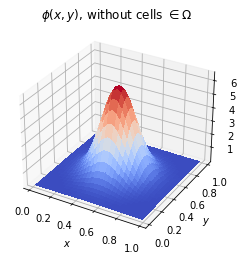

In [67]:
X = x_ax
Y = x_ax

xx, yy = np.meshgrid(X, Y)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xx, yy, n_CPFM_1D_forward[0, 1], cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_title(r'$\phi(x,y)$, without cells $\in \Omega$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
plt.show()

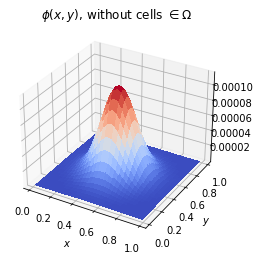

In [70]:
X = x_ax
Y = x_ax

xx, yy = np.meshgrid(X, Y)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xx, yy, n_CPFM_1D_forward[0, 2], cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_title(r'$\phi(x,y)$, without cells $\in \Omega$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
plt.show()

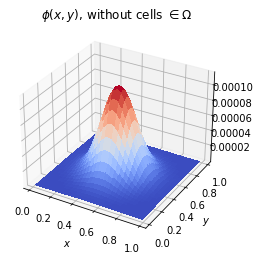

In [71]:
X = x_ax
Y = x_ax

xx, yy = np.meshgrid(X, Y)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xx, yy, n_CPFM_1D_forward[0,:,2], cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_title(r'$\phi(x,y)$, without cells $\in \Omega$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
plt.show()

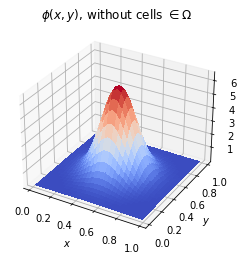

In [69]:
X = x_ax
Y = x_ax

xx, yy = np.meshgrid(X, Y)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xx, yy, n_CPFM_1D_forward[0,:,:,1], cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_title(r'$\phi(x,y)$, without cells $\in \Omega$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
plt.show()

In [34]:
np.shape(mat3d)[1:]

(3, 3, 3)

In [43]:
print(mat3d[0][1:-1, 1:-1, 1:-1])

[[[-5.]]]


In [44]:
mat3d.flatten()

array([ 1. ,  2. ,  3. ,  4. ,  5. ,  6. ,  7. ,  8. ,  9. , -1. , -2. ,
       -3. , -4. , -5. , -6. , -7. , -8. , -9. , 10. , 20. , 30. , 40. ,
       50. , 60. , 70. , 80. , 90. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,
        0.7,  0.8,  0.9, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8,
       -0.9, 11. , 21. , 31. , 41. , 51. , 61. , 71. , 81. , 91. ])

In [45]:
mat1d = mat3d.flatten()

mat3d_ = mat1d.reshape((2, 3, 3, 3))

print(mat3d_)

[[[[ 1.   2.   3. ]
   [ 4.   5.   6. ]
   [ 7.   8.   9. ]]

  [[-1.  -2.  -3. ]
   [-4.  -5.  -6. ]
   [-7.  -8.  -9. ]]

  [[10.  20.  30. ]
   [40.  50.  60. ]
   [70.  80.  90. ]]]


 [[[ 0.1  0.2  0.3]
   [ 0.4  0.5  0.6]
   [ 0.7  0.8  0.9]]

  [[-0.1 -0.2 -0.3]
   [-0.4 -0.5 -0.6]
   [-0.7 -0.8 -0.9]]

  [[11.  21.  31. ]
   [41.  51.  61. ]
   [71.  81.  91. ]]]]


In [51]:
g_arr[1] * mat3d[0] 

array([[[  2.,   4.,   6.],
        [  8.,  10.,  12.],
        [ 14.,  16.,  18.]],

       [[ -2.,  -4.,  -6.],
        [ -8., -10., -12.],
        [-14., -16., -18.]],

       [[ 20.,  40.,  60.],
        [ 80., 100., 120.],
        [140., 160., 180.]]])

In [73]:
n_CPFM_1D_forward[0,1]

array([[1.56525978e-09, 2.42782862e-09, 4.45006978e-09, 8.24817266e-09,
        1.47793234e-08, 2.53214504e-08, 4.13564904e-08, 6.43089887e-08,
        9.51274404e-08, 1.33763364e-07, 1.78686496e-07, 2.26635997e-07,
        2.72800265e-07, 3.11512929e-07, 3.37367609e-07, 3.46460690e-07,
        3.37367609e-07, 3.11512929e-07, 2.72800265e-07, 2.26635997e-07,
        1.78686496e-07, 1.33763364e-07, 9.51274413e-08, 6.43089928e-08,
        4.13565087e-08, 2.53215295e-08, 1.47796537e-08, 8.24949652e-09,
        4.45508676e-09, 2.44517320e-09, 1.61404104e-09],
       [2.42782862e-09, 3.75654411e-09, 6.86752666e-09, 1.27002370e-08,
        2.27112805e-08, 3.88408183e-08, 6.33323733e-08, 9.83341375e-08,
        1.45264213e-07, 2.04024314e-07, 2.72271558e-07, 3.45049282e-07,
        4.15065244e-07, 4.73746598e-07, 5.12922838e-07, 5.26698505e-07,
        5.12922838e-07, 4.73746598e-07, 4.15065244e-07, 3.45049282e-07,
        2.72271558e-07, 2.04024314e-07, 1.45264214e-07, 9.83341405e-08,
       

In [75]:
n_CPFM_1D_forward[0,1, 1]

array([2.42782862e-09, 3.75654411e-09, 6.86752666e-09, 1.27002370e-08,
       2.27112805e-08, 3.88408183e-08, 6.33323733e-08, 9.83341375e-08,
       1.45264213e-07, 2.04024314e-07, 2.72271558e-07, 3.45049282e-07,
       4.15065244e-07, 4.73746598e-07, 5.12922838e-07, 5.26698505e-07,
       5.12922838e-07, 4.73746598e-07, 4.15065244e-07, 3.45049282e-07,
       2.72271558e-07, 2.04024314e-07, 1.45264214e-07, 9.83341405e-08,
       6.33323862e-08, 3.88408720e-08, 2.27114918e-08, 1.27010174e-08,
       6.87016632e-09, 3.76430313e-09, 2.44517320e-09])

In [77]:
max_index_col = np.argmax(n_CPFM_1D_forward[0], axis=0)

print(max_index_col)

max_index_row = np.argmax(n_CPFM_1D_forward[0], axis=1)

print(max_index_row)

[[15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
  15 15 15 15 15 15 15]
 [15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
  15 15 15 15 15 15 15]
 [15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
  15 15 15 15 15 15 15]
 [15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
  15 15 15 15 15 15 15]
 [15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
  15 15 15 15 15 15 15]
 [15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
  15 15 15 15 15 15 15]
 [15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
  15 15 15 15 15 15 15]
 [15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
  15 15 15 15 15 15 15]
 [15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
  15 15 15 15 15 15 15]
 [15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
  15 15 15 15 15 15 15]
 [15 15 15 15 15 15 

In [80]:
np.argmax(n_CPFM_1D_forward[0], axis=[0, 1])

TypeError: 'list' object cannot be interpreted as an integer

In [ ]:
X = x_ax
Y = x_ax

xx, yy = np.meshgrid(X, Y)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xx, yy, n_CPFM_1D_forward[0,:,:,1], cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_title(r'$\phi(x,y)$, without cells $\in \Omega$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
plt.show()

In [87]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

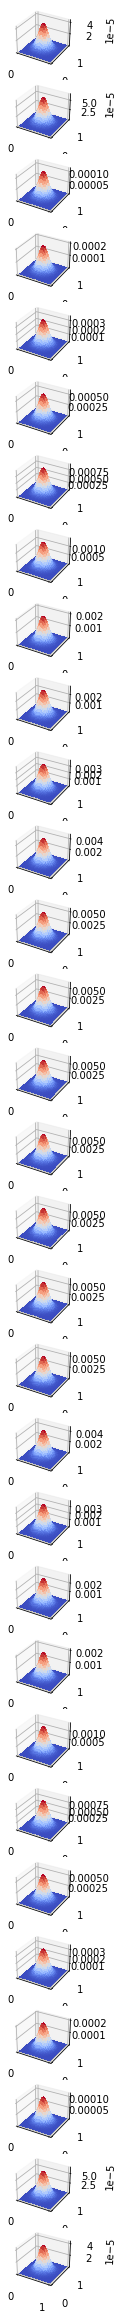

In [88]:
X = x_ax
Y = x_ax

xx, yy = np.meshgrid(X, Y)

fig = plt.figure(figsize=(20, 42))

for i in range(np.shape(x_ax)[0]):
    
    ax = fig.add_subplot(X.shape[0], 1, i+1, projection='3d')
    ax.plot_surface(xx, yy, n_CPFM_1D_forward[0,:,:,i], cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    
plt.show()
    

In [81]:
np.shape(x_ax)

(31,)

In [82]:
np.shape(n_CPFM_1D_forward[0,:,:,1])

(31, 31)